In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc,accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns


In [6]:

# Load the Iris dataset
df=pd.read_excel("heart_dataset.xlsx",sheet_name='Sheet1')
X = df.iloc[:,1:12]
y = df.target
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,1,3,145,233,1,0,150,0,2.3,0,0
1,1,2,130,250,0,1,187,0,3.5,0,0
2,0,1,130,204,0,0,172,0,1.4,2,0
3,1,1,120,236,0,1,178,0,0.8,2,0
4,0,0,120,354,0,1,163,1,0.6,2,0


In [7]:
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

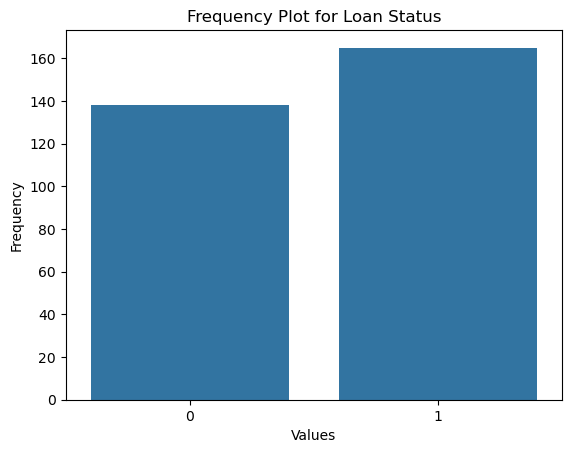

In [8]:
sns.countplot(x=y)
plt.title('Frequency Plot for Loan Status')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [9]:

# Combine two classes into one: here combining class 1 and class 2
y = y.apply(lambda x: 0 if x == 0 else 1)  # Combine classes 1 and 2 into one class labeled as '1'


In [10]:

# Scale the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = X_scaled.iloc[:,[0]]

In [11]:
# Encoding the labels, though it's already binary
lblencoder = LabelEncoder()
y_encoded = lblencoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


## Logistic regression

In [12]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [14]:
threshold = 0.5

lr_train_proba = lr.predict_proba(X_train)[:, 1]
lr_train_pred = (lr_train_proba >= threshold).astype(int)

lr_test_proba = lr.predict_proba(X_test)[:, 1]
lr_test_pred = (lr_test_proba >= threshold).astype(int)

lr_train_acc = round(accuracy_score(y_train,lr_train_pred)*100,2)
lr_test_acc = round(accuracy_score(y_test,lr_test_pred)*100,2)

print('Test Accuracy = ' , lr_train_acc,' %')
print('Train Accuracy = ' , lr_test_acc,' %')

Test Accuracy =  62.81  %
Train Accuracy =  55.74  %


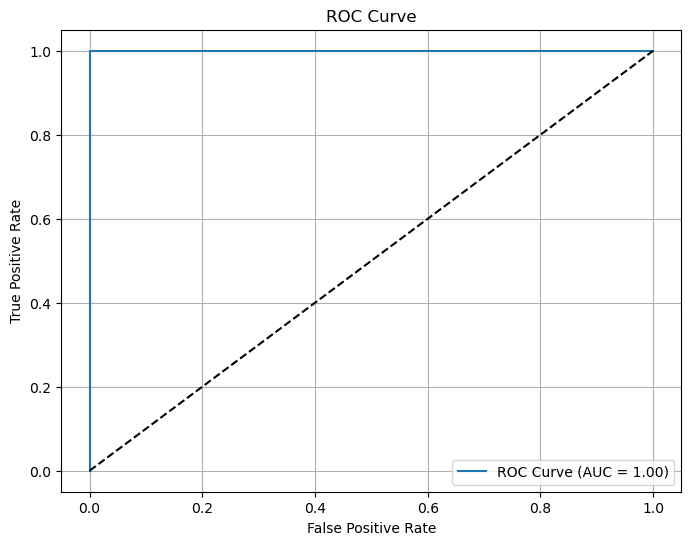

In [26]:
# plotting ROC Curve
lr_fprs, lr_tprs, lr_thresholds = roc_curve(lr_test_pred, lr_test_proba)

plt.figure(figsize=(8, 6))

plt.plot(lr_fprs, lr_tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(lr_fprs, lr_tprs)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.grid(True)
plt.show()



Best Threshold: 0.7436802851871445


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

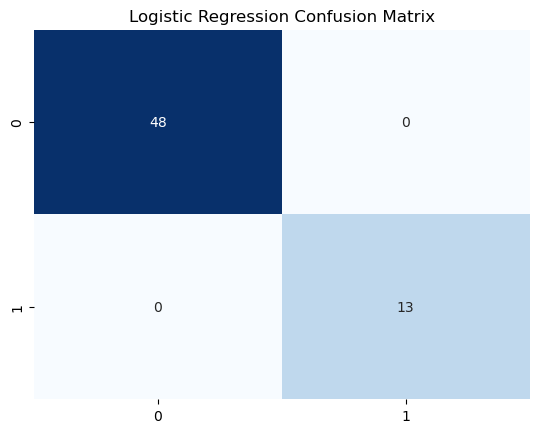

In [28]:
# Find the best threshold based on TPR - FPR
lr_best_threshold_index = np.argmax(lr_tprs - lr_fprs)
lr_best_threshold = lr_thresholds[lr_best_threshold_index]

print("Best Threshold:", lr_best_threshold)
# Predict using the best threshold
lr_test_best_pred = (lr_test_proba >= lr_best_threshold).astype(int)

conf_matrix = confusion_matrix(lr_test_best_pred, lr_test_best_pred)

sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False,)

plt.title('Logistic Regression Confusion Matrix')

## KNN Classification

In [20]:
K = 3
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)  # Fit the model

KNeighborsClassifier(n_neighbors=3)

In [21]:
threshold = 0.5

knn_train_proba = knn.predict_proba(X_train)[:, 1]
knn_train_pred = (knn_train_proba >= threshold).astype(int)

knn_test_proba = knn.predict_proba(X_test)[:, 1]
knn_test_pred = (knn_test_proba >= threshold).astype(int)

knn_train_acc = round(accuracy_score(y_train,knn_train_pred)*100,2)
knn_test_acc = round(accuracy_score(y_test,knn_test_pred)*100,2)

print('Test Accuracy = ' , knn_test_acc,' %')
print('Train Accuracy = ' , knn_train_acc,' %')

Test Accuracy =  55.74  %
Train Accuracy =  62.81  %


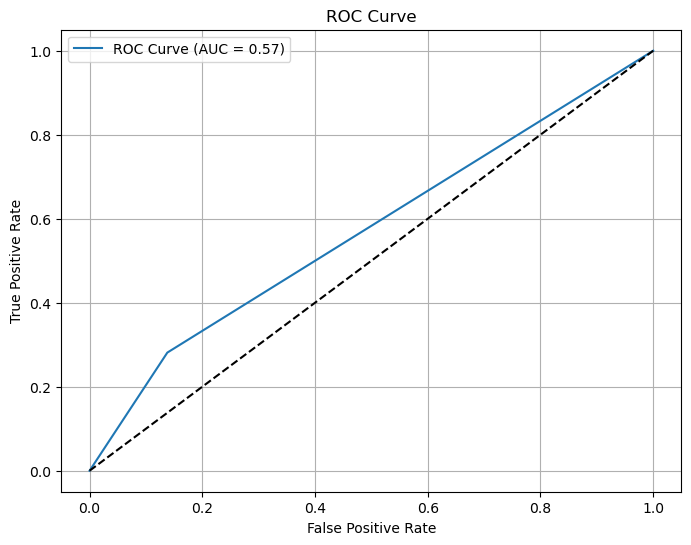

Best Threshold: 0.6666666666666666


In [22]:
# plotting ROC Curve
knn_fprs, knn_tprs, knn_thresholds = roc_curve(y_test, knn_test_proba)

plt.figure(figsize=(8, 6))

plt.plot(knn_fprs, knn_tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(knn_fprs, knn_tprs)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.grid(True)
plt.show()



Best Threshold: 0.6666666666666666


Text(0.5, 1.0, 'K-Nearest Neighbors Confusion Matrix')

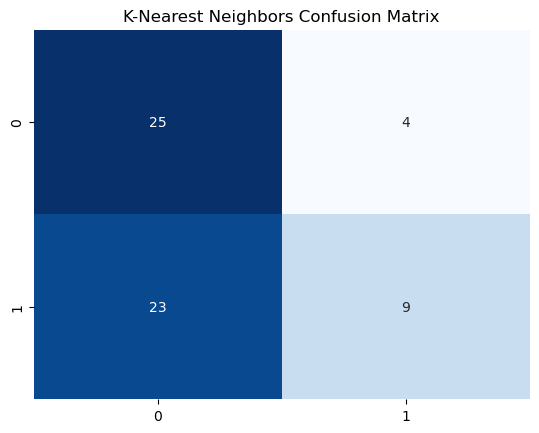

In [23]:
# Find the best threshold based on TPR - FPR
knn_best_threshold_index = np.argmax(knn_tprs - knn_fprs)
knn_best_threshold = knn_thresholds[knn_best_threshold_index]

print("Best Threshold:", knn_best_threshold)
# Predict using the best threshold
knn_test_best_pred = (knn_test_proba >= knn_best_threshold).astype(int)
knn_conf_matrix = confusion_matrix(y_test, knn_test_best_pred)

sns.heatmap(knn_conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('K-Nearest Neighbors Confusion Matrix')


## Decision Tree

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
threshold = 0.5

dt_train_proba = dt.predict_proba(X_train)[:, 1]
dt_train_pred = (dt_train_proba >= threshold).astype(int)

dt_test_proba = dt.predict_proba(X_test)[:, 1]
dt_test_pred = (dt_test_proba >= threshold).astype(int)

dt_train_acc = round(accuracy_score(y_train,dt_train_pred)*100,2)
dt_test_acc = round(accuracy_score(y_test,dt_test_pred)*100,2)

print('Test Accuracy = ' , dt_test_acc,' %')
print('Train Accuracy = ' , dt_train_acc,' %')


Test Accuracy =  55.74  %
Train Accuracy =  62.81  %


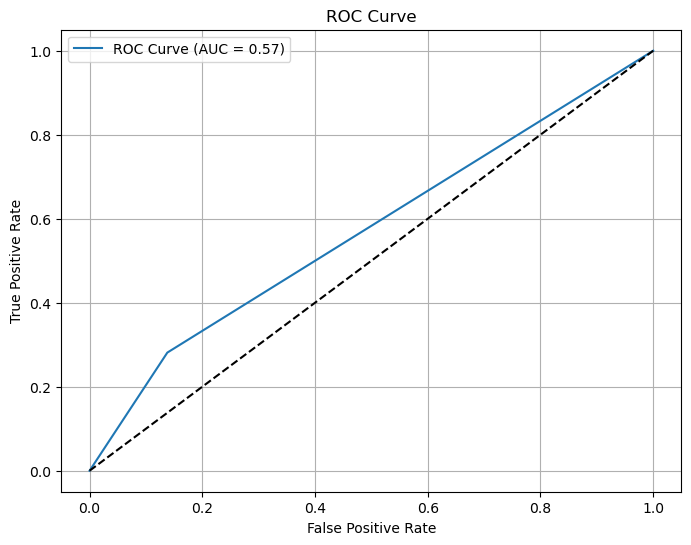

In [33]:
# plotting ROC Curve
dt_fprs, dt_tprs, dt_thresholds = roc_curve(y_test, dt_test_proba)

plt.figure(figsize=(8, 6))

plt.plot(dt_fprs, dt_tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(dt_fprs, dt_tprs)))

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend()
plt.grid(True)
plt.show()



Best Threshold: 0.7590361445783133


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

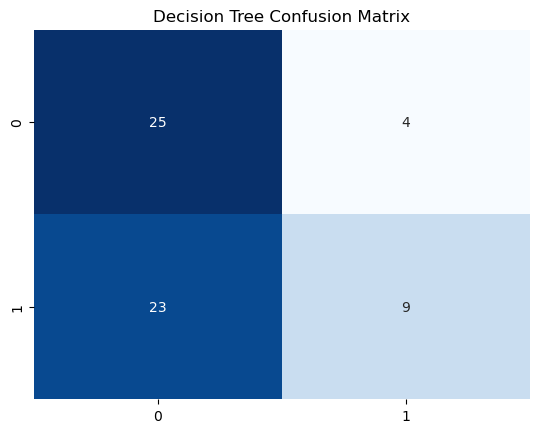

In [35]:
# Find the best threshold based on TPR - FPR
dt_best_threshold_index = np.argmax(dt_tprs - dt_fprs)
dt_best_threshold = dt_thresholds[dt_best_threshold_index]

print("Best Threshold:", dt_best_threshold)
# Predict using the best threshold
dt_test_best_pred = (dt_test_proba >= dt_best_threshold).astype(int)
knn_conf_matrix = confusion_matrix(y_test, dt_test_best_pred)

sns.heatmap(knn_conf_matrix,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Decision Tree Confusion Matrix')


In [82]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','K Nearest Neighbors','Decision Tree'
    ],
    'Training Accuracy': [
        lr_train_acc,knn_train_acc,dt_train_acc
    ],
    'Model Accuracy Score': [
       lr_test_acc,knn_test_acc,dt_test_acc
    ]
})
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
0,Logistic Regression,62.81,55.74
1,K Nearest Neighbors,62.81,55.74
2,Decision Tree,62.81,55.74


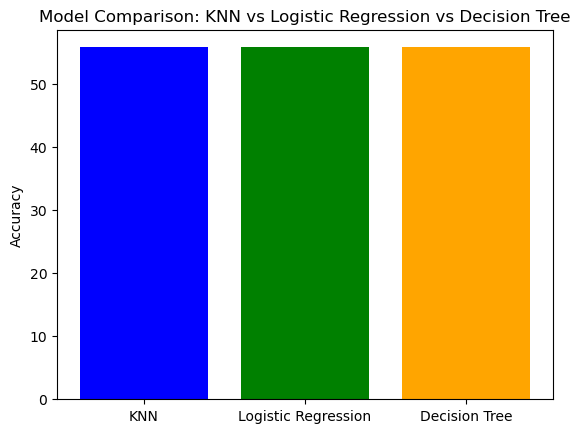

In [83]:
modelss = ['KNN', 'Logistic Regression','Decision Tree']
accuracies = [ knn_test_acc,lr_test_acc,dt_test_acc]

plt.bar(modelss, accuracies, color=['blue', 'green','orange'])
plt.title('Model Comparison: KNN vs Logistic Regression vs Decision Tree')
plt.ylabel('Accuracy')
plt.show()